Text analysis
https://www.sbert.net/docs/usage/semantic_textual_similarity.html
Given the same information need, how different is query text of different users

How query text evolves through conversation.

Yes, you can compute similarity between queries with SBERT or some other sentence similarity methods.

# Creation of the list according to the amount of json file for each topic

In each list, you find in order the queries of each user for this specific topic.

This code should loop over each file in the topic1_phone directory and check if it's a JSON file. If it is, it loads the JSON data and extracts the messages that were sent by the specified users (in this case, U04RH7PFJ6Q and YHEJSIM5). It then prints the messages and adds them to a list with a unique name (list1, list2, etc.).

In [14]:

import os
import json



# Define the users we're interested in
users = ["U04RH7PFJ6Q", "U04Q81LB5SL"]

# Define the directory containing the JSON files
directory = '/Users/alejandroospina/Desktop/1. USI/4. IV SEMESTER/1. Thesis/ConversationalThesis/SplitOfConversationbyTopic/textAnalysisByTopic/topic1_phone'

# Define a counter variable to generate unique list names
counter = 1

# Loop over each file in the directory
for filename in os.listdir(directory):
    # Check that the file is a JSON file
    if filename.endswith(".json"):
        # Open the file and load the JSON data
        with open(os.path.join(directory, filename)) as f:
            data = json.load(f)
            
        # Extract the messages from the data that were sent by the specified users
        messages = [msg["text"] for msg in data if msg["user"] in users]
        
        # Remove the first element of the messages list
        messages = messages[2:]
        
        # Rename the list with a unique name
        new_list_name = "list{}".format(counter)
        counter += 1
        globals()[new_list_name] = messages
        
        # Print the messages and the new list name
        print("New list name:", new_list_name)
        print(messages)
     


New list name: list1
['Can you recommend an Android phone with an excellent camera?', 'the Samsung Galaxy looks cool but my grandma is new to Android - is there a course for elderly people around Bellinzona?', 'awesome, thanks for the info. my little cousin is an expert but I think she spends way too much time on her phone imo… do you have any strategies to help her “disconnect” once in a while?', 'are there specific apps for limiting screen time that you know of?', 'I’ll probably use some of them myself :slightly_smiling_face:', 'do you have any relaxation/meditation tips btw?', 'I’ll definitely try yoga']
New list name: list2
['I would like to buy a new phone. What are the main aspects that I should consider?', 'My operating system of choice for a new phone is Android. I am looking for a phone with durable battery life, fast performance and a large storage.', 'What are the prices of the phones you described?', 'Based on the previous requirements for battery life, performance, and sto

# Calculate the similarity between the sentences of each user


The function iterate through the longest list and replace the missing elements in the shorter lists with a default value (such as 0)

the max_len variable is set to the length of the longest list. The inner loop then iterates through the first max_len elements of each list, even if some of the lists have fewer elements than that. If a list has fewer than max_len elements, it is padded with the default value (0) using the extend method.

Note that padding the shorter lists with a default value may affect the cosine similarity scores. In particular, if the default value is significantly different from the actual values in the list, it may artificially reduce the similarity score between pairs of items that have missing values.

In [18]:
# export the DataFrame to a CSV file
df.to_csv('output.csv', index=False)


In [24]:
import os
import json
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def get_similarity_score(run_list):
    # Convert all elements in the run_list to strings
    run_list = [str(item) for item in run_list]

    # Instantiate TfidfVectorizer
    vectorizer = TfidfVectorizer()

    # Transform the texts into tf-idf vectors
    tfidf_matrix = vectorizer.fit_transform(run_list)

    # Calculate the cosine similarity between the vectors
    similarity_matrix = cosine_similarity(tfidf_matrix)

    # Compute the average similarity score
    similarity_score = similarity_matrix.mean()

    return similarity_score

# Find the length of the longest list
max_length = max(len(list1), len(list2), len(list3), len(list4), len(list5), len(list6)) ##  --> put here the new list that sort from te previous code


# Create a dictionary to store similarity scores for each run list
similarity_scores = {}

# Create new lists (run1, run2, etc.) and compute similarity scores
for i in range(max_length):
    run_list_name = "run{}".format(i + 1)
    run_list = [globals()["list{}".format(j)][i] for j in range(1, counter) if i < len(globals()["list{}".format(j)])]
    globals()[run_list_name] = run_list

    # Compute similarity score for the current run list
    similarity_score = get_similarity_score(run_list)
    similarity_scores[run_list_name] = similarity_score

    # Print the messages, new run list name, and similarity score
    print("New run list name:", run_list_name)
    print(run_list)
    print("Similarity score for {}: {}".format(run_list_name, similarity_score))




New run list name: run1
['Can you recommend an Android phone with an excellent camera?', 'I would like to buy a new phone. What are the main aspects that I should consider?', 'Imagine you are buying a phone and you are interested in things to consider when buying one\n', 'Imagine you are buying a phone and you are interested in things to consider when buying one.', 'Hi again, can you help me choosing a new phone?', 'Imagine you are buying a phone and you are interested in things to consider when buying one.\n']
Similarity score for run1: 0.40366531460461086
New run list name: run2
['the Samsung Galaxy looks cool but my grandma is new to Android - is there a course for elderly people around Bellinzona?', 'My operating system of choice for a new phone is Android. I am looking for a phone with durable battery life, fast performance and a large storage.', 'I’m looking for a device with good battery life and amazing camera quality. What do you suggest?', 'Which phone is the cheapier?', 'I w

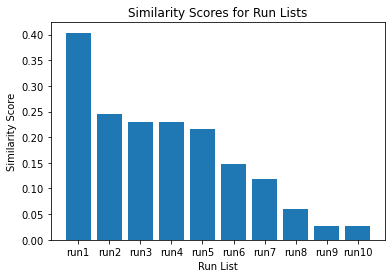

In [23]:
# Plot the bar chart
plt.bar(similarity_scores.keys(), similarity_scores.values())
plt.xlabel("Run List")
plt.ylabel("Similarity Score")
plt.title("Similarity Scores for Run Lists")
plt.show()

In [33]:
def get_similarity_score(run_list):
    # Convert all elements in the run_list to strings
    run_list = [str(item) for item in run_list]

    # Instantiate TfidfVectorizer
    vectorizer = TfidfVectorizer()

    # Transform the texts into tf-idf vectors
    tfidf_matrix = vectorizer.fit_transform(run_list)

    # Calculate the cosine similarity between the vectors
    similarity_matrix = cosine_similarity(tfidf_matrix)

    # Compute the average similarity score
    similarity_score = similarity_matrix.mean()

    # Compute the variance of the similarity scores
    variance_score = similarity_matrix.var()

    return similarity_matrix, similarity_score, variance_score


In [34]:
similarity_scores = []
variance_scores = []


In [35]:
for i in range(max_length):
    run_list_name = "run{}".format(i + 1)
    run_list = [globals()["list{}".format(j)][i] for j in range(1, counter) if i < len(globals()["list{}".format(j)])]
    globals()[run_list_name] = run_list

    # Compute similarity score and variance score for the current run list
    similarity_matrix, similarity_score, variance_score = get_similarity_score(run_list)
    similarity_scores.append(similarity_score)
    variance_scores.append(variance_score)

    # Print the messages, new run list name, similarity score, and variance score
    print("New run list name:", run_list_name)
    print(run_list)
    print("Similarity score for {}: {}".format(run_list_name, similarity_score))
    print("Variance score for {}: {}".format(run_list_name, variance_score))


New run list name: run1
['Can you recommend an Android phone with an excellent camera?', 'I would like to buy a new phone. What are the main aspects that I should consider?', 'Imagine you are buying a phone and you are interested in things to consider when buying one\n', 'Imagine you are buying a phone and you are interested in things to consider when buying one.', 'Hi again, can you help me choosing a new phone?', 'Imagine you are buying a phone and you are interested in things to consider when buying one.\n']
Similarity score for run1: 0.40366531460461086
Variance score for run1: 0.1790298632393554
New run list name: run2
['the Samsung Galaxy looks cool but my grandma is new to Android - is there a course for elderly people around Bellinzona?', 'My operating system of choice for a new phone is Android. I am looking for a phone with durable battery life, fast performance and a large storage.', 'I’m looking for a device with good battery life and amazing camera quality. What do you sug

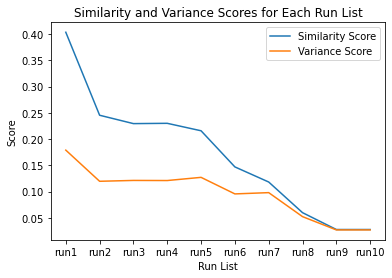

In [36]:
# Create a list of run list names
run_list_names = ["run{}".format(i + 1) for i in range(max_length)]

# Plot the similarity scores and variance scores
fig, ax = plt.subplots()
ax.plot(run_list_names, similarity_scores, label="Similarity Score")
ax.plot(run_list_names, variance_scores, label="Variance Score")
ax.legend()
ax.set_title("Similarity and Variance Scores for Each Run List")
ax.set_xlabel("Run List")
ax.set_ylabel("Score")
plt.show()


A similarity score measures how similar two or more items are to each other. It is usually expressed as a value between 0 and 1, where 0 indicates no similarity and 1 indicates perfect similarity. In the context of text analysis, a similarity score can be used to measure the similarity between two or more pieces of text based on various features such as word usage, sentence structure, and so on.

A variance score, on the other hand, measures the amount of variability or spread in a set of values. It is a measure of how far the individual values in a distribution are from the mean value of the distribution. A high variance score indicates that the values are spread out widely from the mean, while a low variance score indicates that the values are clustered closely around the mean. In the context of text analysis, a variance score can be used to measure how much the similarity scores of different texts vary from each other.

So, while a similarity score measures how similar two or more items are to each other, a variance score measures how much the similarity scores of different items vary from each other. Both similarity scores and variance scores can be useful in different ways for text analysis, depending on the specific research question or application.

A variance score of 0 indicates no variation at all (i.e., all similarity scores are the same), while a variance score of 1 indicates maximum variation (i.e., the similarity scores are spread out as far as possible from the mean score). Therefore, a variance score of 0.179 indicates a moderate level of variation, which suggests that there may be some diversity in the content or style of the texts in run1.

Number of new words in run1: 31
Number of new words in run2: 14
Number of new words in run3: 6
Number of new words in run4: 2
Number of new words in run5: 4
Number of new words in run6: 1
Number of new words in run7: 1
Number of new words in run8: 1
Number of new words in run9: 0
Number of new words in run10: 0


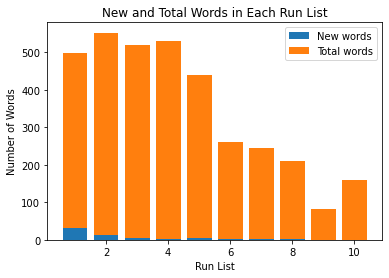

In [43]:
from collections import Counter
import os
import json
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Find the length of the longest list
max_length = max(len(list1), len(list2), len(list3), len(list4), len(list5), len(list6)) ##  --> put here the new list that sort from te previous code

# Initialize a set to store the unique words in all run lists
all_words = set()

# Initialize lists to store the number of new words and the total number of words in each run list
new_word_counts = []
total_word_counts = []

# Iterate over each run list
for i in range(max_length):
    run_list_name = "run{}".format(i + 1)
    
    # Concatenate all the run lists into a single list
    all_items = []
    for j in range(1, counter):
        if i < len(globals()["list{}".format(j)]):
            if isinstance(globals()["list{}".format(j)][i], (list, str)):
                all_items.extend(globals()["list{}".format(j)][i])

    # Compute the unique words in the current run list that are not present in previous run lists
    new_words = set(all_items) - all_words

    # Compute the total number of words in the current run list and add it to the total word counts
    total_word_count = len(all_items)
    total_word_counts.append(total_word_count)

    # Compute the number of new words and add it to the new word counts
    new_word_count = len(new_words)
    new_word_counts.append(new_word_count)

    # Print the number of new words and add them to the set of all words
    print("Number of new words in {}: {}".format(run_list_name, new_word_count))
    all_words.update(new_words)

# Create a bar chart of the new word counts and total word counts for each run list
plt.bar(range(1, max_length+1), new_word_counts, label="New words")
plt.bar(range(1, max_length+1), total_word_counts, bottom=new_word_counts, label="Total words")
plt.xlabel("Run List")
plt.ylabel("Number of Words")
plt.title("New and Total Words in Each Run List")
plt.legend()
plt.show()


This code initializes two lists new_word_counts and total_word_counts to store the number of new words and the total number of words in each run list. It then iterates over each run list, concatenates all the lists into a single list, computes the number of new words and total words, and adds them to the respective lists. Finally, it creates a bar chart of the new and total word counts for each run list using Matplotlib.

The resulting bar chart will show the number of new words and the total number of words in each run list. The height of the blue bars represents the number of new words, while the height of the orange bars represents the total number of words.

# Conclusion

Similarity scores: The similarity scores range from 0.06 to 0.40. This suggests that there is a moderate level of similarity between the texts in each run list. A similarity score of 1 would indicate identical texts, whereas a score of 0 would indicate completely dissimilar texts.

Variance scores: The variance scores range from 0.03 to 0.18. This suggests that the texts in each run list have some degree of variation, with some lists having more variation than others. A variance score of 0 would indicate that all the texts in the run list are identical.

New words: The number of new words in each run list ranges from 0 to 31. This suggests that some run lists have more new words than others. A higher number of new words could indicate a greater diversity of topics or a greater level of specificity in the questions being asked.